<a href="https://colab.research.google.com/github/vatsaaa/mtech/blob/main/semester_1/03_assignments/aci/ACI_ASSIGNMENT_1/ipynb/ACI_Assignment_1_SolutionTemplate_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

1. [G. Ankur Vatsa](mailto:2023aa05727@wilp.bits-pilani.ac.in)
2. [NIDASANAMETLA SREE SITAMAHALAKSHMI](mailto:2023aa05716@wilp.bits-pilani.ac.in)
3. [PRASENJIT SAMANTA](mailto:2023aa05256@wilp.bits-pilani.ac.in)               10% effort contribution
4. [RANDHAWANE SANTOSH](mailto:2023aa05828@wilp.bits-pilani.ac.in)
5. [VEDAGIRI SAI KRISHNA](mailto:2023aa05348@wilp.bits-pilani.ac.in)            5% effort contribution

In [35]:
#Code Block : Set Initial State (Must handle dynamic inputs)
class GridGenerator:
    def __init__(self):
        self.grid = [
            ['.', '.', '.', '.', '#', '#', '.', '.'],
            ['.', 'F', 'F', '.', '.', '.', '.', 'F'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['#', '#', '.', 'F', '.', '.', '.', '.'],
            ['.', 'F', '.', '.', '.', '.', '#', '#'],
            ['.', '.', '.', 'F', '.', '.', '.', '.'],
            ['.', '#', '#', '.', '.', 'F', '.', '.'],
            ['.', '.', '.', '.', '.', 'F', '.', '.']
        ]

    def generate_grid(self):
        def set_position(position, symbol):
            row, col = position
            if row < 0 or row > len(self.grid) or col < 0 or col > len(self.grid[0]):
                return None, "Please enter rows position between 0 to {rows} and columns between 0 to {cols}".format(rows=len(self.grid - 1), cols=len(self.grid[0] - 1))

            if self.grid[row][col] == '#':
                self.print_grid()
                return None, f"Invalid {symbol} position! This cell is occupied by a water body ('#')."

            if self.grid[row][col] == 'F':
                self.print_grid()
                return None, f"Invalid {symbol} position! This cell is flooded ('F')."

            if self.grid[row][col] == 'S':
                self.print_grid()
                return None, f"Invalid {symbol} position! The start and the Goal position cannot be same."

            self.grid[row][col] = symbol

            return self.grid, None

        # Start position input and validation
        while True:
            start_input = input("\nEnter the start position (row,col): ")
            start_row, start_col = map(int, start_input.split(','))
            grid_with_start, error_message = set_position((start_row, start_col), 'S')
            if error_message:
                print(error_message)
            else:
                break

        # Goal position input and validation
        while True:
            goal_input = input("\nEnter the goal position (row,col): ")
            goal_row, goal_col = map(int, goal_input.split(','))
            grid_with_goal, error_message = set_position((goal_row, goal_col), 'G')
            if error_message:
                print(error_message)
            else:
                break

        # Print final grid with start and goal positions
        print("\nFinal grid with start and goal positions:")
        self.print_grid()

    def print_grid(self):
        for row in self.grid:
            print(' '.join(row))


In [37]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)
import platform, pprint, random, sys, time

if platform.system() == "Windows":
    import psutil
elif platform.system() == "Darwin" or platform.system() == "Linux":
    import resource

if platform.system() == "Windows":
    def track_time_and_space(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            start_memory = psutil.Process().memory_info().rss

            result = func(*args, **kwargs)

            end_time = time.time()
            end_memory = psutil.Process().memory_info().rss

            print(platform.system(), start_memory, end_memory)

            execution_time = end_time - start_time
            memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes

            print(f"Execution time: {execution_time} seconds")
            print(f"Memory usage: {memory_usage} KB")

            return result, execution_time, memory_usage

        return wrapper
else:
    def track_time_and_space(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            start_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

            result = func(*args, **kwargs)

            end_time = time.time()
            end_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

            execution_time = end_time - start_time
            memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes

            print(f"Execution time: {execution_time} seconds")
            print(f"Memory usage: {memory_usage} KB")

            return result, execution_time, memory_usage

        return wrapper


In [53]:
#Code Block : Write function to design the Transition Model/Successor function
# Ideally this would be called while search algorithms are implemented
import matplotlib.pyplot as plt

class GridEnvironment:
    def __init__(self, grid: list[list[str]], display: bool = False):
        def find_start_and_goal():
            start: tuple = (-1, -1)
            goal: tuple = (-1, -1)
            for i in range(self.rows):
                for j in range(self.cols):
                    if self.grid[i][j] == 'S':
                        start = tuple((i, j))
                    elif self.grid[i][j] == 'G':
                        goal = tuple((i, j))
            print("Start {start}, Goal {goal}:".format(start=start, goal=goal))
            return start, goal

        self.grid = grid
        self.rows = len(self.grid)
        self.cols = len(self.grid[0])
        self.display = display
        self.start, self.goal = find_start_and_goal()

    def visualize(self, path):
         # Define colors for different elements
        colors = {'S': 'green', '.': 'white', '#': 'black', 'F': 'red', 'G': 'blue'}
        # Create a plot
        fig, ax = plt.subplots()

        # Plot each element with specified colors
        for i in range(self.rows):
            for j in range(self.cols):
                ax.text(i, j, self.grid[i][j], ha='center', va='center', color=colors[self.grid[i][j]])

        # Customize ticks
        ax.set_xticks(range(len(self.grid[0])))
        ax.set_yticks(range(len(self.grid)))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        plt.title('S - Start, G - Goal')
        plt.xlabel('# - Water Bodies')
        plt.ylabel('F - Flooded Roads')

        # Add grid lines
        ax.grid(True, which='both', color='black', linewidth=1.5, linestyle='-', alpha=0.3)

        col = ['red', 'green', 'blue', 'cyan', 'magenta', 'orange', 'purple']
        colors = [col[random.randint(0, 6)] for _ in range(sys.getsizeof(path)-1)]
        X, Y = zip(*path)

        # Plot the path with different colors for each segment
        for i in range(sys.getsizeof(path)-1):
            plt.plot(X[i:i+2], Y[i:i+2], color=colors[i])

        # plt.plot(*zip(*path), marker='o', color='red', label='Path')
        # plt.scatter(*path[0], marker='o', color='green', label='Start')
        # plt.scatter(*path[-1], marker='o', color='blue', label='Goal')

        plt.legend()
        plt.show()

    def is_valid_move(self, row, col):
        return (
            0 <= row < self.rows
            and 0 <= col < self.cols
            and self.grid[row][col] != '#'
            and self.grid[row][col] != 'F'
        )

    def get_adjacent_cells(self, row, col, algorithm=None):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)] #degrees of freedom - need to revise by prasnejit
        adjacent_cells = [] # Return empty list of adjacent cells if all moves are invalid
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            if self.is_valid_move(new_row, new_col):
                if algorithm == "greedy" and self.display:
                    print(" The move is valid for this %d and %d" % (new_row, new_col))
                adjacent_cells.append(tuple((new_row, new_col)))
        return adjacent_cells

    def goal_reached(self, row, col):
        return (row, col) == self.goal

from abc import ABC, abstractmethod

class ISearchAlgorithm(ABC):
    def __init__(self, grid_env: GridEnvironment) -> None:
        super().__init__()

    @abstractmethod
    def search(self):
        pass

    def heuristic(self, row: int, col: int):
        pass

    def time_and_space_complexity(self):
      pass

In [71]:
# Code block : Write fucntion to handle goal test (Must handle dynamic inputs)
# Ideally this would be called while search algorithms are implemented

"""
This function is a part of GridEnvironment class. It is placed
here only to ensure that the insrtuctions of the assignment are
followed as mentioned in the template document. Following code
is not independent unit and hence is executed only through an
instance of GridEnvironment class.
"""
def goal_reached(self, row, col):
    return (row, col) == self.goal

## 2.	Definition of Algorithm 1 (Greedy Best First Search)

In [55]:
#Code Block : Function for algorithm 1 implementation
from heapq import heappush, heappop
from collections import deque
from typing import List, Tuple

class GBFSearchAlgorithm(ISearchAlgorithm):
    def __init__(self, grid_env: GridEnvironment) -> None:
        super().__init__(grid_env=grid_env)
        self.grid_env = grid_env

    @track_time_and_space
    def search(self) -> Tuple[List[Tuple[int, int]], int, int]:
        start = self.grid_env.start
        goal = self.grid_env.goal
        visited = set()
        pq = [(self.heuristic(*start), start)]
        came_from = {}
        cost_so_far = {start: 0}  # Store the cost of reaching each cell
        self.total_nodes_expanded = 0

        total_branching_factor = 0
        depth_of_solution = 0
        self.max_pq_size = 0
        self.avg_branching_factor = 0
        self.time_complexity = 0
        self.space_complexity = 0

        while pq:
                print("Open List (Priority Queue):", pq)
                print("Closed List (Visited Set):", visited)
                self.max_pq_size = max(self.max_pq_size, len(pq))
                priority, current = heappop(pq)  # Pop the item with lowest priority
                if current == goal:
                    # Reconstruct the path
                    path = deque()
                    total_cost = cost_so_far[current]
                    while current != start:
                        path.appendleft(current)
                        current = came_from[current]
                        depth_of_solution += 1  # Increment depth for each step towards the start node
                    path.appendleft(start)
                    break  # Exit the loop when the goal node is found

                visited.add(current)
                self.total_nodes_expanded += 1

                successors = self.grid_env.get_adjacent_cells(*current, algorithm="greedy")
                total_branching_factor += len(successors)

                for next_cell in successors:
                    if next_cell in visited:  # Check if the cell has already been visited
                        continue  # Skip to the next iteration if the cell has been visited

                    new_cost = cost_so_far[current] + 1  # Assuming each step has a cost of 1
                    if next_cell not in cost_so_far or new_cost < cost_so_far[next_cell]:
                        cost_so_far[next_cell] = new_cost
                        # print("Cost of next cell", cost_so_far[next_cell])
                        priority = new_cost + self.heuristic(*next_cell)
                        print("Priority of next cell", priority)
                        heappush(pq, (priority, next_cell))  # Add the next cell to the priority queue
                        came_from[next_cell] = current

            # Store the depth of the optimal solution
        self.depth_of_solution = depth_of_solution
        self.avg_branching_factor = round(total_branching_factor / self.total_nodes_expanded)
        print("Average Branching Factor:", self.avg_branching_factor)
        print("Depth of the graph search tree is:", self.depth_of_solution)
            # Optionally, you can return the path and total cost if needed
        print("Total nodes expanded:", self.total_nodes_expanded)
        self.time_complexity, self.space_complexity = self.time_and_space_complexity()
        print("Time Complexity of GBFS:", self.time_complexity)
        print("Worst case Space Complexity of GBFS:", self.space_complexity)
        return list(path), total_cost

    def heuristic(self, row: int, col: int) -> int:
        score = 0
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_row, new_col = row + dr, col + dc
            if 0 <= new_row < self.grid_env.rows and 0 <= new_col < self.grid_env.cols:
                if self.grid_env.grid[new_row][new_col] == '.':
                    score += 5  # Add 5 points for adjacent safe places
                elif self.grid_env.grid[new_row][new_col] == '#':
                    score -= 5  # Deduct 5 points for adjacent water bodies
                elif self.grid_env.grid[new_row][new_col] == 'F':
                    score -= 3  # Deduct 3 points for flooded roads
        return score

    def time_and_space_complexity(self):
        # Time complexity: O(b^d) | Space complexity: O(m)
        return self.avg_branching_factor ** self.depth_of_solution, self.max_pq_size

## 3.	Definition of Algorithm 2 (Genetic Search Algorithm)

In [73]:
# Code Block : Function for algorithm 2 implementation

class Individual(ABC):
    def __init__(self, grid_env: GridEnvironment):
        self.individual_type = "Child"  # Every individual is a child, until it is a parent
        self.grid_env = grid_env
        self.path = [tuple(grid_env.start)]
        self.fitness = 0

        current_pos = grid_env.start
        while current_pos != grid_env.goal:
            adjacent_cells = grid_env.get_adjacent_cells(*current_pos, algorithm="genetic")
            next_pos = random.choice(adjacent_cells)
            self.path.append(next_pos)
            current_pos = next_pos

    def set_path(self, path: list):
        self.path = path


    def evaluate_fitness(self):
        for pos in self.path:
            row, col = pos
            if self.grid_env.grid[row][col] == '.':
                self.fitness += 5
            elif self.grid_env.grid[row][col] == '#':
                self.fitness -= 5
            elif self.grid_env.grid[row][col] == 'F':
                self.fitness -= 3

    def mutate(self, mutation_rate: float):
        for i in range(1, len(self.path) - 1):
            if random.random() < mutation_rate:
                adjacent_cells = self.grid_env.get_adjacent_cells(*self.path[i], algorithm="genetic")
                self.path[i] = random.choice(adjacent_cells)

class GeneticSearchAlgorithm(ISearchAlgorithm):
    def __init__(self, grid_env: GridEnvironment):
        super().__init__(grid_env=grid_env)
        self.grid_env = grid_env

        self.population_size = 10
        self.generations = 100
        self.mutation_rate = 0.01

        self.time_complexity = None
        self.space_complexity = None

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, min(len(parent1.path), len(parent2.path)) - 1)
        # Single point crossover
        child_path = parent1.path[:crossover_point] + parent2.path[crossover_point:]

        child = Individual(self.grid_env)
        child.set_path(child_path)

        return child

    @track_time_and_space
    def search(self):
        population = [Individual(self.grid_env) for _ in range(self.population_size)]
        self.total_nodes_expanded = 0
        for generation in range(self.generations):
            for individual in population:
                individual.evaluate_fitness()
                self.total_nodes_expanded += 1

            population.sort(key=lambda x: x.fitness, reverse=True)

            if population[0].fitness == 40:  # Max possible fitness - to be revised later
                break

            next_generation = population[:2]  # Elitism
            while len(next_generation) < self.population_size:
                parent1 = random.choice(population[:self.population_size // 2])
                parent2 = random.choice(population[:self.population_size // 2])
                child = self.crossover(parent1, parent2)
                child.mutate(self.mutation_rate)
                next_generation.append(child)

            population = next_generation
        print("Memory Computation for Genetic Search is :", self.total_nodes_expanded)
        best_individual = population[0]
        path = best_individual.path
        cost = 0
        for pos in path:
            row, col = pos
            if self.grid_env.grid[row][col] == '.':
                cost += 5
            elif self.grid_env.grid[row][col] == '#':
                cost -= 5
            elif self.grid_env.grid[row][col] == 'F':
                cost -= 3

        total_individuals = sum(len(individual.path) for individual in population)
        average_individual_size = total_individuals / self.population_size

        # Time complexity calculation: O(g * n * m)
        self.time_complexity = self.generations * self.population_size * average_individual_size
        print("Time Complexity of Genetic Search Algorithm:", self.time_complexity)
        self.space_complexity = self.population_size * len(population[0].path)
        print("Space Complexity of Genetic Search Algorithm:", self.space_complexity)

        return path, cost

    def time_and_space_complexity(self):
      return self.time_complexity, self.space_complexity

class SearchAlgorithmFactory:
    @staticmethod
    def create_search_algorithm(args, env: GridEnvironment):
        display = True if "-d" in args or "--display" in args else False
        if not env:
            grid_gen = GridGenerator()
            grid_gen.generate_grid()
            env = GridEnvironment(grid_gen.grid, display)

        if display:
            pprint(env.grid) # Print the grid

        gbfs = True if "-b" in args or "--gbfs" in args else False
        genetic = True if "-a" in args or "--genetic" in args else False
        if gbfs:
            return GBFSearchAlgorithm(env)
        elif genetic:
            return GeneticSearchAlgorithm(env)
        else:
            print("Please select an algorithm to run. Use -h for help.")
            return

## Dynamic Input

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [74]:
#Code Block : Function & call to get inputs (start/end state)
def dynamic_grid_generator(rows, cols):
    total_cells = rows * cols

    # Ensure at least 1 'F' obstacle and 1 '#' obstacle
    min_f_obstacles = 1
    min_hash_obstacles = 1

    # Calculate the maximum number of obstacles based on the total number of cells
    max_f_obstacles = int(total_cells / 3)  # Maximum 1/3 of cells for 'F' obstacles
    max_hash_obstacles = int(total_cells / 3)  # Maximum 1/3 of cells for '#' obstacles

    # Randomly choose the number of 'F' and '#' obstacles within the specified range
    num_f_obstacles = random.randint(min_f_obstacles, max_f_obstacles)
    num_hash_obstacles = random.randint(min_hash_obstacles, max_hash_obstacles)

    # Initialize grid with all safe places ('.')
    grid = [['.' for _ in range(cols)] for _ in range(rows)]

    # Place 'F' obstacles randomly
    for _ in range(num_f_obstacles):
        row, col = random.randint(0, rows - 1), random.randint(0, cols - 1)
        grid[row][col] = 'F'

    # Place '#' obstacles randomly
    for _ in range(num_hash_obstacles):
        row, col = random.randint(0, rows - 1), random.randint(0, cols - 1)
        # Ensure the cell is not already occupied and not occupied by 'F' obstacle
        while grid[row][col] != '.':
            row, col = random.randint(0, rows - 1), random.randint(0, cols - 1)
        grid[row][col] = '#'

    # Place 'S' (start) position
    start_row, start_col = random.randint(0, rows - 1), random.randint(0, cols - 1)
    grid[start_row][start_col] = 'S'

    # Place 'G' (goal) position
    goal_row, goal_col = random.randint(0, rows - 1), random.randint(0, cols - 1)
    while (goal_row, goal_col) == (start_row, start_col):
        goal_row, goal_col = random.randint(0, rows - 1), random.randint(0, cols - 1)
    grid[goal_row][goal_col] = 'G'

    return grid

## 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [75]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
from datetime import datetime

args = []
dt_now = datetime.now()
args.append("-b")

gbfs = SearchAlgorithmFactory.create_search_algorithm(args, None)
gbfs_results, gbfs_etime, gbfs_emem = gbfs.search()
gbfs_path = gbfs_results[0]
gbfs_cost = gbfs_results[1]

print("Path taken by the agent using Greedy Best First Search:", gbfs_path)
print("Total path cost using Greedy Best First Search:", gbfs_cost)
print("Total Memory Usage Greedy Best First Search:", gbfs.total_nodes_expanded)


Enter the start position (row,col): 0,0

Enter the goal position (row,col): 7,6

Final grid with start and goal positions:
S . . . # # . .
. F F . . . . F
. . . . . . . .
# # . F . . . .
. F . . . . # #
. . . F . . . .
. # # . . F . .
. . . . . F G .
Start (0, 0), Goal (7, 6):
Open List (Priority Queue): [(10, (0, 0))]
Closed List (Visited Set): set()
Priority of next cell 3
Priority of next cell 3
Open List (Priority Queue): [(3, (0, 1)), (3, (1, 0))]
Closed List (Visited Set): {(0, 0)}
Priority of next cell 9
Open List (Priority Queue): [(3, (1, 0)), (9, (0, 2))]
Closed List (Visited Set): {(0, 1), (0, 0)}
Priority of next cell 7
Open List (Priority Queue): [(7, (2, 0)), (9, (0, 2))]
Closed List (Visited Set): {(0, 1), (1, 0), (0, 0)}
Priority of next cell 5
Open List (Priority Queue): [(5, (2, 1)), (9, (0, 2))]
Closed List (Visited Set): {(0, 1), (1, 0), (2, 0), (0, 0)}
Priority of next cell 16
Open List (Priority Queue): [(9, (0, 2)), (16, (2, 2))]
Closed List (Visited Set): {(0, 

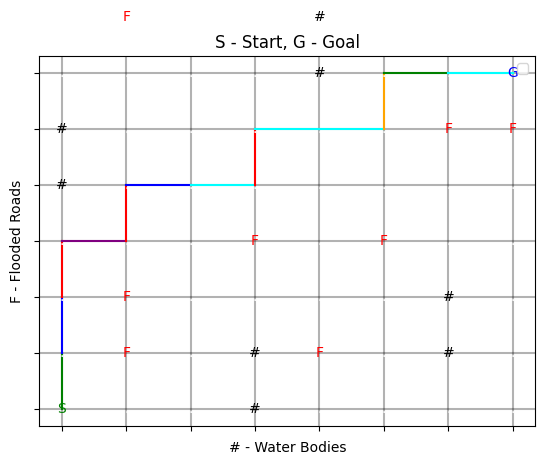

In [76]:
gbfs.grid_env.visualize(gbfs_path)
args.remove("-b")

In [77]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
args.append("-a")

# Note: Use the grid_env that was created for GBFS, since we want Genetic Search to run on the same grid
genetic_search = SearchAlgorithmFactory.create_search_algorithm(args, gbfs.grid_env)
gs_results, gs_etime, gs_emem = genetic_search.search()
gs_path = gs_results[0]
gs_cost = gs_results[1]

print("Path taken by the agent using Genetic Search Algorithm:", gs_path)
print("Total path cost using Genetic Search Algorithm:", gs_cost)
print("Total Memory Usage Genetic Search Algorithm:", genetic_search.total_nodes_expanded)

Memory Computation for Genetic Search is : 1000
Time Complexity of Genetic Search Algorithm: 790000.0
Space Complexity of Genetic Search Algorithm: 9880
Execution time: 1.609490156173706 seconds
Memory usage: 0.0 KB
Path taken by the agent using Genetic Search Algorithm: [(0, 0), (0, 1), (0, 2), (0, 1), (0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (2, 2), (2, 3), (2, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 4), (1, 5), (2, 5), (2, 4), (1, 4), (1, 3), (0, 3), (0, 2), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (2, 1), (2, 0), (2, 1), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (2, 2), (2, 1), (2, 0), (2, 1), (2, 2), (2, 3), (2, 2), (3, 2), (4, 2), (3, 2), (4, 2), (5, 2), (5, 1), (5, 2), (4, 2), (3, 2), (4, 2), (3, 2), (4, 2), (5, 2), (4, 2), (5, 2), (4, 2), (5, 2), (5, 1), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (4, 2), (4, 3), (4, 2), (3, 2), (2, 2), (3, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (4, 4), (4, 3), (4, 2),

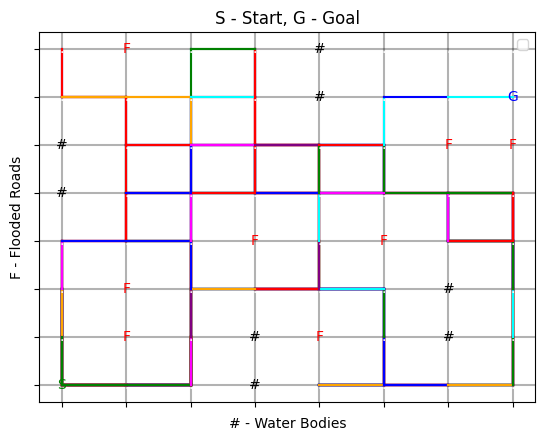

In [78]:
genetic_search.grid_env.visualize(gs_path)

## 5.	Comparitive Analysis

In [79]:
#Code Block : Print the Time & Space complexity of GBFS algorithm
gbfs_time_complexity, gbfs_space_complexity = gbfs.time_and_space_complexity()
print("Greedy Best First Search: \n\ttime complexity: {gbfs_tc} \n\tand \n\tspace complexity: {gbfs_sc}".format(gbfs_tc=gbfs_time_complexity, gbfs_sc=gbfs_space_complexity))

Greedy Best First Search: 
	time complexity: 1594323 
	and 
	space complexity: 6


In [80]:
#Code Block : Print the Time & Space complexity of Genetic algorithm
gs_tc, gs_sc = genetic_search.time_and_space_complexity()
print("Genetic Search: \n\ttime complexity: {gs_tc} \n\tand \n\tspace complexity: {gs_sc}".format(gs_tc=gs_tc, gs_sc=gs_sc))

Genetic Search: 
	time complexity: 790000.0 
	and 
	space complexity: 9880


# 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

- GBFS efficiently finds shortest paths but struggles with dead ends caused by blockages. Hence, it may require restarting from different paths.
- Genetic Algorithm explores diverse paths simultaneously, potentially bypassing dead ends. But finding optimal paths can be slower and require tuning parameters.
-  Hence, GBFS is memory efficient and faster for clear paths. However, it gets stuck on blockages. While genetic search algorithm handle blockages better but is slower and consumes much larger memory.